In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/wxs8_/Downloads/Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

In [18]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

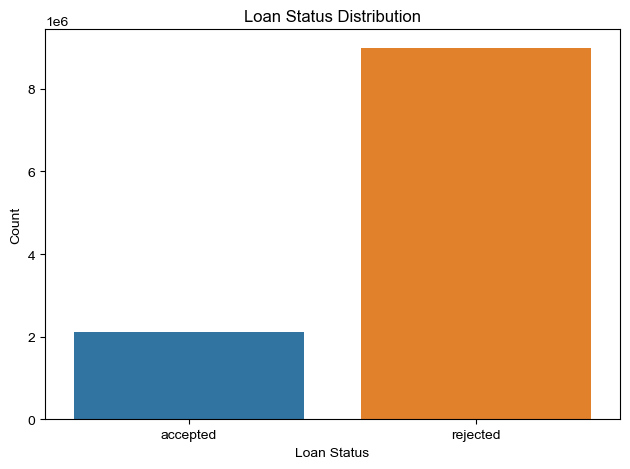

In [7]:
# plot 1
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution', fontsize=12)
plt.xlabel('Loan Status', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

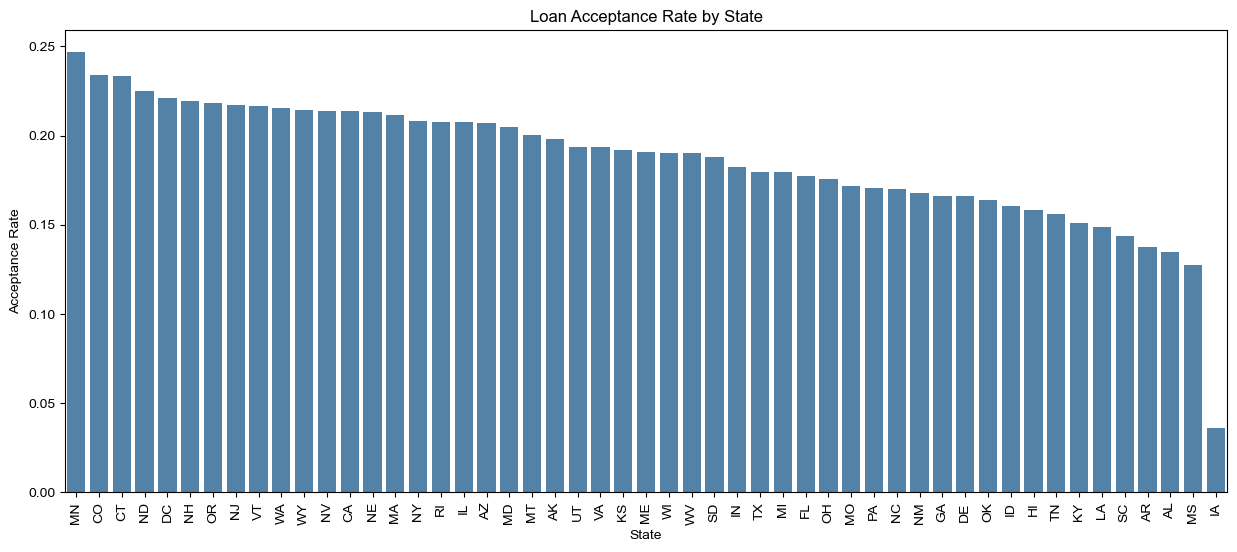

In [9]:
# plot 2
state_acceptance = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
state_acceptance['acceptance_rate'] = state_acceptance['accepted']

state_acceptance = state_acceptance.sort_values('acceptance_rate', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=state_acceptance.index, y=state_acceptance['acceptance_rate'], color='steelblue')
plt.title('Loan Acceptance Rate by State', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=10)
plt.xlabel('State', fontsize=10)
plt.xticks(rotation=90)
plt.show()

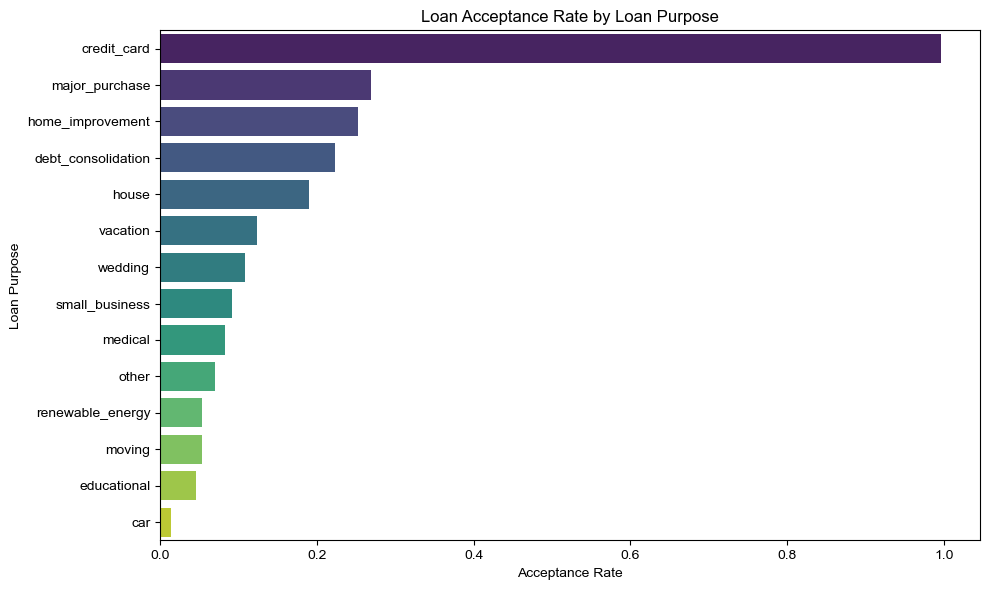

In [10]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'accepted' else 0)

# plot 3
acceptance_by_purpose = df.groupby('purpose')['loan_status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=acceptance_by_purpose.values, y=acceptance_by_purpose.index, palette='viridis')
plt.title('Loan Acceptance Rate by Loan Purpose', fontsize=12)
plt.xlabel('Acceptance Rate', fontsize=10)
plt.ylabel('Loan Purpose', fontsize=10)
plt.tight_layout()
plt.show()

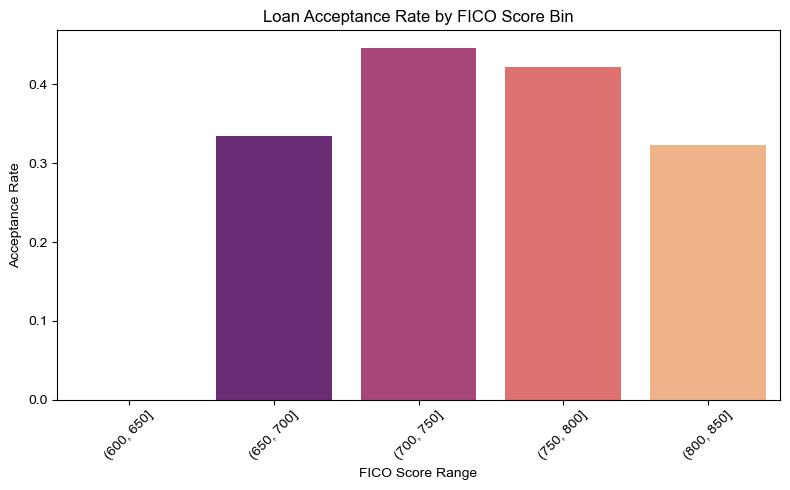

In [16]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'accepted' else 0)

# plot 4
df['fico_bin'] = pd.cut(df['fico_avg'], bins=[600, 650, 700, 750, 800, 850])

acceptance_by_fico = df.groupby('fico_bin')['loan_status'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=acceptance_by_fico.index.astype(str), y=acceptance_by_fico.values, palette='magma')
plt.title('Loan Acceptance Rate by FICO Score Bin', fontsize=12)
plt.xlabel('FICO Score Range', fontsize=10)
plt.ylabel('Acceptance Rate', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df['issue_or_application_date'] = pd.to_datetime(df['issue_or_application_date'])

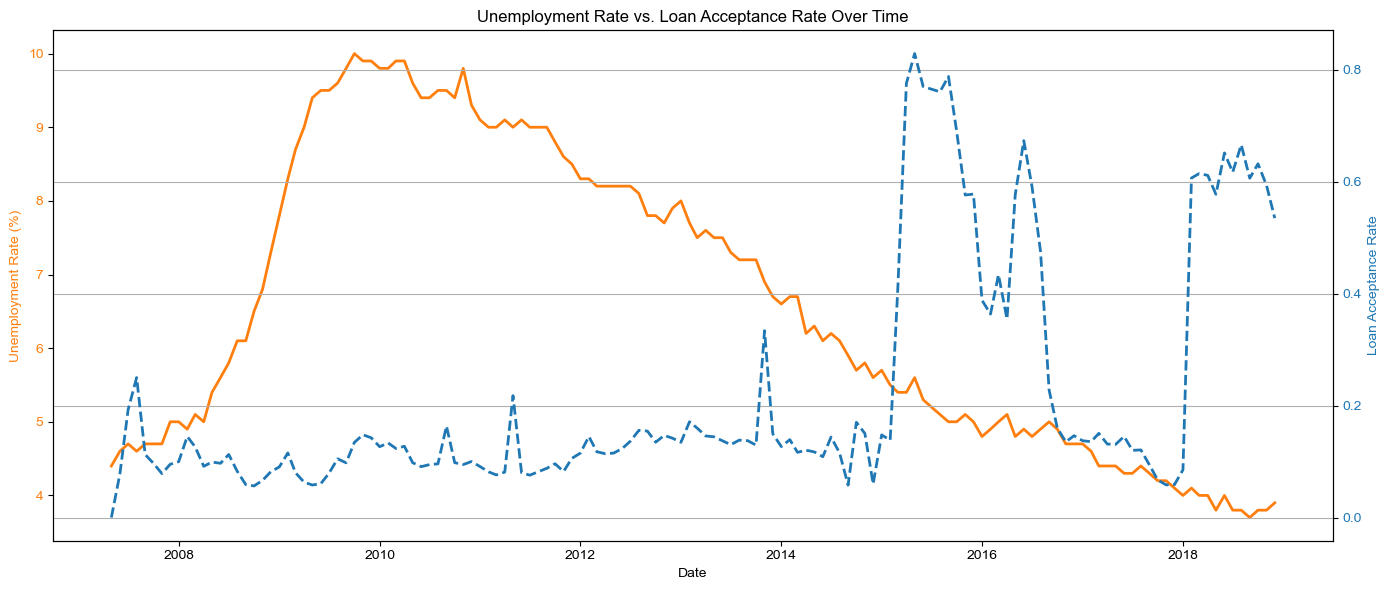

In [21]:
# Group by month and calculate average unemployment + acceptance rate
monthly_unemp = df.groupby(df['issue_or_application_date'].dt.to_period('M')).agg({
    'unemployment_rate': 'mean',
    'loan_status': lambda x: (x == 'accepted').mean()
}).reset_index()

monthly_unemp['issue_or_application_date'] = monthly_unemp['issue_or_application_date'].dt.to_timestamp()

# Plot 5
fig, ax1 = plt.subplots(figsize=(14, 6))

color_unemp = 'tab:orange'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Unemployment Rate (%)', color=color_unemp, fontsize=10)
ax1.plot(monthly_unemp['issue_or_application_date'], monthly_unemp['unemployment_rate'], color=color_unemp, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_unemp, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

ax2 = ax1.twinx()
color_accept = 'tab:blue'
ax2.set_ylabel('Loan Acceptance Rate', color=color_accept, fontsize=10)
ax2.plot(monthly_unemp['issue_or_application_date'], monthly_unemp['loan_status'], color=color_accept, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_accept, labelsize=10)

plt.title('Unemployment Rate vs. Loan Acceptance Rate Over Time', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

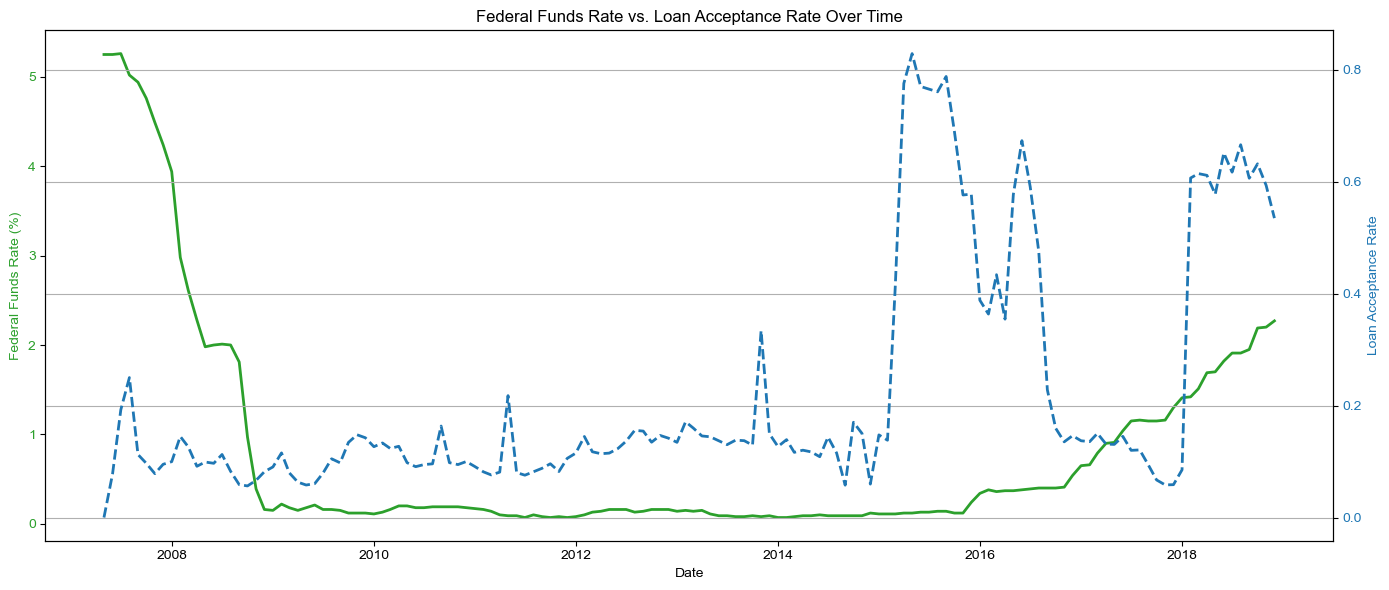

In [22]:
# Group by month and calculate average fed rate + acceptance rate
monthly_fed = df.groupby(df['issue_or_application_date'].dt.to_period('M')).agg({
    'fed_fund_effective_rate': 'mean',
    'loan_status': lambda x: (x == 'accepted').mean()
}).reset_index()

monthly_fed['issue_or_application_date'] = monthly_fed['issue_or_application_date'].dt.to_timestamp()

# Plot 6
fig, ax1 = plt.subplots(figsize=(14, 6))

color_fed = 'tab:green'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Federal Funds Rate (%)', color=color_fed, fontsize=10)
ax1.plot(monthly_fed['issue_or_application_date'], monthly_fed['fed_fund_effective_rate'], color=color_fed, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_fed, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

ax2 = ax1.twinx()
color_accept = 'tab:blue'
ax2.set_ylabel('Loan Acceptance Rate', color=color_accept, fontsize=10)
ax2.plot(monthly_fed['issue_or_application_date'], monthly_fed['loan_status'], color=color_accept, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_accept, labelsize=10)

plt.title('Federal Funds Rate vs. Loan Acceptance Rate Over Time', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

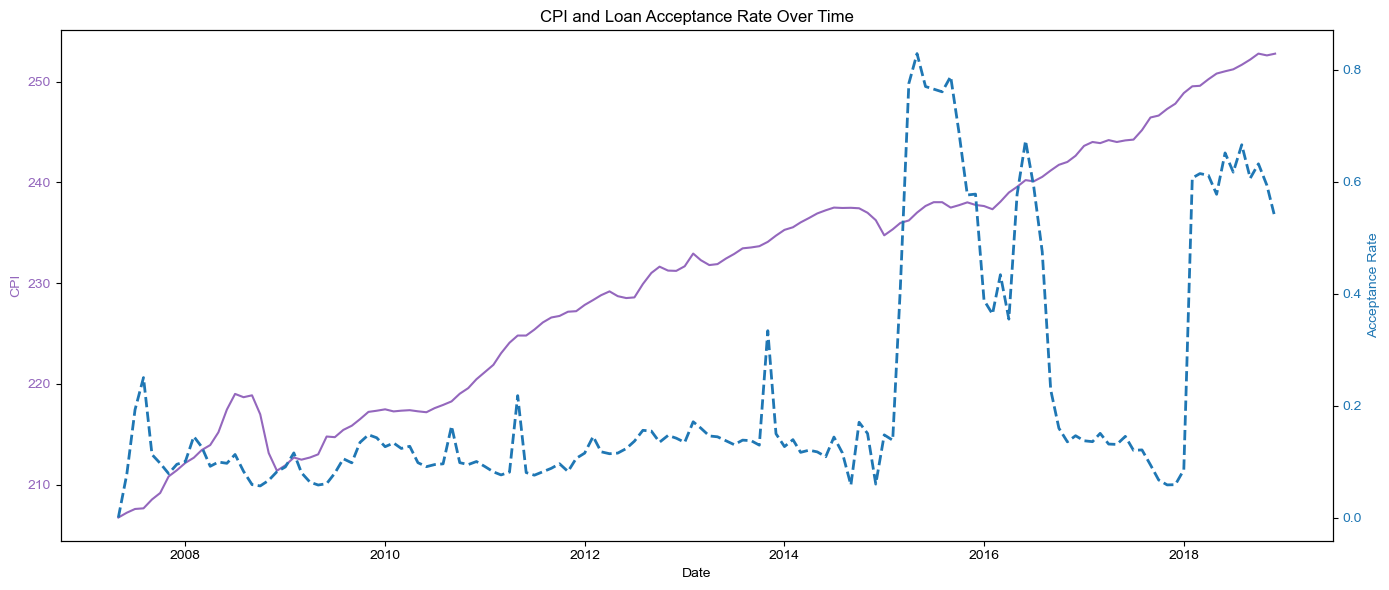

In [23]:
monthly = df.groupby(df['issue_or_application_date'].dt.to_period('M')).agg({
    'consumer_price_index': 'mean',
    'loan_status': lambda x: (x == 'accepted').mean()
}).reset_index()

monthly['issue_or_application_date'] = monthly['issue_or_application_date'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:purple'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('CPI', color=color, fontsize=10)
ax1.plot(monthly['issue_or_application_date'], monthly['consumer_price_index'], color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

ax2 = ax1.twinx()
color_accept = 'tab:blue'
ax2.set_ylabel('Acceptance Rate', color=color_accept, fontsize=10)
ax2.plot(monthly['issue_or_application_date'], monthly['loan_status'], color=color_accept, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_accept, labelsize=10)

plt.title('CPI and Loan Acceptance Rate Over Time', fontsize=12)
plt.tight_layout()
plt.show()